In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
df.drop(columns=['year' , 'month'] , axis = 1 , inplace = True)

In [7]:
df.head()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
0,0,2.75,5.3,1464
1,1,2.50,5.3,1394
2,2,2.50,5.3,1357
3,3,2.50,5.3,1293
4,4,2.50,5.4,1256


In [8]:
df.corr()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-0.934555,0.935300,-0.988246
interest_rate,-0.934555,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-0.925814,1.000000,-0.922338
index_price,-0.988246,0.935793,-0.922338,1.000000


Text(0.5, 0, 'index_price')

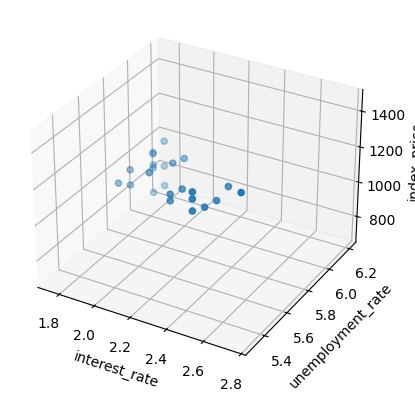

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['interest_rate'] , df['unemployment_rate'] , df['index_price'])

ax.set_xlabel('interest_rate')
ax.set_ylabel('unemployment_rate')
ax.set_zlabel('index_price')

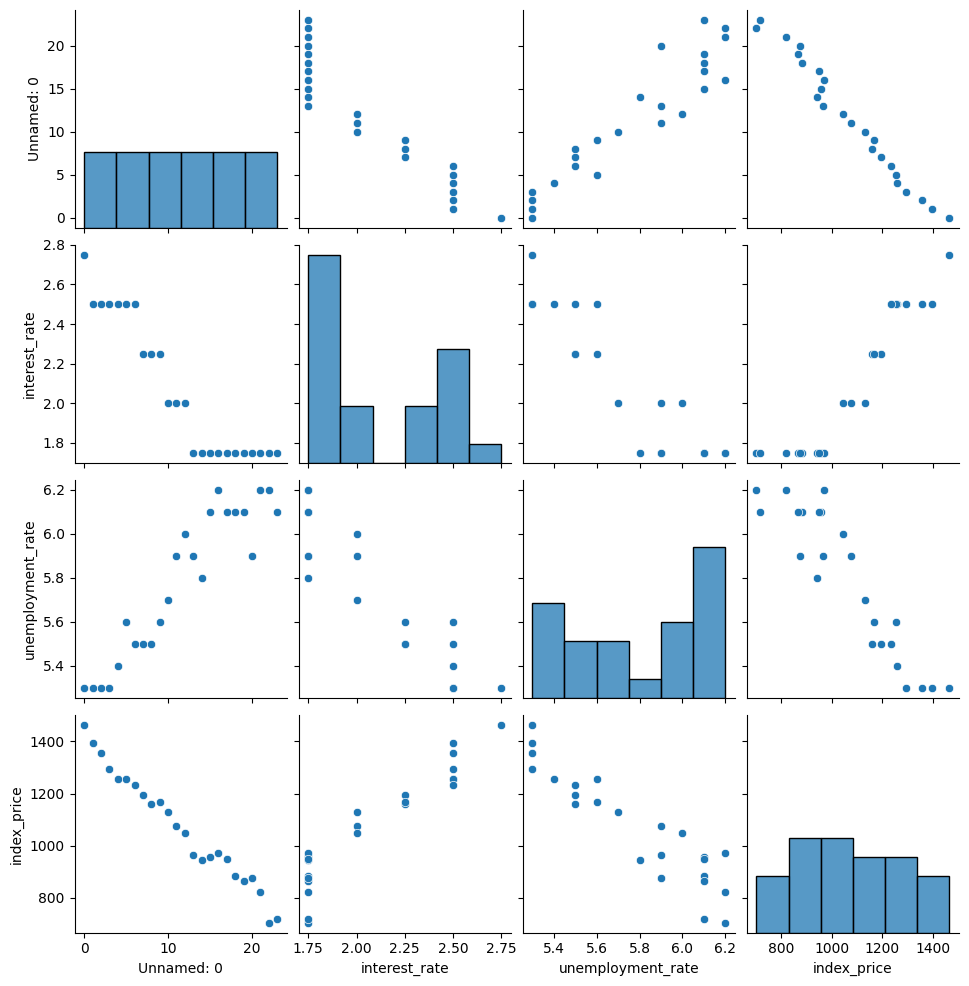

In [14]:
sns.pairplot(df)

In [15]:
#Independent and Dependent features

X = df.iloc[:,:-1]
y = df.iloc[: , -1]

In [16]:
X.head()

,Unnamed: 0,interest_rate,unemployment_rate
0,0,2.75,5.3
1,1,2.50,5.3
2,2,2.50,5.3
3,3,2.50,5.3
4,4,2.50,5.4


In [17]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [19]:
#train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
#Apply Linear Regression

from sklearn.linear_model import LinearRegression

In [25]:
regression = LinearRegression()

In [27]:
regression.fit(X_train , y_train)

LinearRegression()

In [28]:
y_pred = regression.predict(X_test)

In [34]:
new_data = [[0 , 2.5 , 5.4]]
predicted_price = regression.predict(new_data)
print(f"Predicted Index Price: {predicted_price[0]:.2f}")

Predicted Index Price: 1073.46
